In [14]:
import numpy as np
import cv2
import os
from skimage.feature import local_binary_pattern
import copy
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from skimage.feature import hog
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib 
import time

In [15]:
def scrapeFile(file):
    filepath = file
    X={}
    Y={}
    with open(filepath) as fp:  
        line = fp.readline()      
        while line:
            l=line.strip()
            a=l.split(",")
            temp=[]
            for p in a[1:]:
                temp.append(float(p))
            X[int(a[0])]=temp
            Y[int(a[0])]=np.argmax(temp)
            line = fp.readline()
    return X,Y

In [16]:
def hog_f(image):
    hist = hog(image,orientations=9,pixels_per_cell=(16,16),cells_per_block=(3,3))
    temp=[]
    for j in range(len(hist)):
        temp.append(hist[j])
    return temp

In [17]:
def color_lbp_f(image):
    R=image[:,:,2]
    G=image[:,:,1]
    B=image[:,:,0]    
    lbp_r = local_binary_pattern(R,8,1,'uniform')
    lbp_g = local_binary_pattern(G,8,1,'uniform')
    lbp_b = local_binary_pattern(B,8,1,'uniform') 
    l_r = np.histogram(lbp_r, bins=np.arange(257), density=True)[0]
    l_g = np.histogram(lbp_g, bins=np.arange(257), density=True)[0]
    l_b = np.histogram(lbp_b, bins=np.arange(257), density=True)[0] 
    return list(l_b)+list(l_g)+list(l_r)

In [18]:
def color_hog_f(image):
    R=image[:,:,2]
    G=image[:,:,1]
    B=image[:,:,0]
    hist_R =hog(R,orientations=9,pixels_per_cell=(16,16),cells_per_block=(3,3))
    hist_G=hog(G,orientations=9,pixels_per_cell=(16,16),cells_per_block=(3,3))
    hist_B=hog(B,orientations=9,pixels_per_cell=(16,16),cells_per_block=(3,3))
    temp1=[]
    temp2=[]
    temp3=[]
    for j in range(len(hist_R)):
        temp1.append(hist_R[j])
        temp2.append(hist_G[j])
        temp3.append(hist_B[j])
    return temp3+temp2+temp1

In [19]:
###########################PCA############################
def pca_feature(X):
    pca=PCA(n_components=0.99)
    pca.fit(X)
    newX=(pca.transform(X))
    return list(newX)

In [20]:
###################MOMENTS FEATURE#########################
def image_moment_feature(image):
    ret,thresh = cv2.threshold(image,80,255,0)
    im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
    #print(np.shape(contours))
    cnt = contours[0]
    M = cv2.moments(cnt)
    f=[]
    for k in M:
        f.append(M[k])
    return list(f)

In [21]:
def feature_extraction(img,gray):
    featureset=[]
#     featureset+=find_lbp(img)
    #featureset+=image_moment_feature(img)
    featureset+=hog_f(gray)
    return featureset

In [22]:
def qwise_prediction(prediction):
    prediction=np.array(prediction)
    prediction=prediction.T
    Q1_pred=normalize(prediction[:,0:3])
    Q2_pred=normalize(prediction[:, 3:5])
    Q3_pred=normalize(prediction[:, 5:7])
    Q4_pred=normalize(prediction[:, 7:9])
    Q5_pred=normalize(prediction[:, 9:13])
    Q6_pred=normalize(prediction[:, 13:15])
    Q7_pred=normalize(prediction[:, 15:18])
    Q8_pred=normalize(prediction[:, 18:25])
    Q9_pred=normalize(prediction[:, 25:28])
    Q10_pred=normalize(prediction[:, 28:31])
    Q11_pred=normalize(prediction[:, 31:37])
    result=[Q1_pred,Q2_pred,Q3_pred,Q4_pred,Q5_pred,Q6_pred,Q7_pred,Q8_pred,Q9_pred,Q10_pred,Q11_pred]
    return result


In [23]:
def rmse_calculation(y_true,prediction):
    mse=[]
    for i in range(11):
        y=np.array(y_true[i].iloc[7000:10000])
        mse.append(mean_squared_error(y,prediction[i]))
    return mse

In [24]:
def plotGraph(x,y):
    plt.bar(x,y)
    plt.xlabel("Question")
    plt.ylabel("RMSE")
    plt.show()

In [25]:
def normalize(zl):
    e_x = np.exp(zl - np.max(zl))
    gz=e_x / e_x.sum()
    y=gz/gz.sum(axis=1)[:,None]
    return y

In [26]:
df=pd.read_csv("training_solutions_rev1.csv")
y=["GalaxyID"]
for x in df.columns[1:]:
    y.append(x[-1])
df.columns=y

In [27]:
#Separation of questions
Q1=df.iloc[:, 1:4]
q1=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q2=df.iloc[:, 4:6]
q2=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q3=df.iloc[:, 6:8]
q3=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q4=df.iloc[:, 8:10]
q4=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q5=df.iloc[:, 10:14]
q5=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q6=df.iloc[:, 14:16]
q6=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q7=df.iloc[:, 16:19]
q7=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q8=df.iloc[:, 19:26]
q8=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q9=df.iloc[:, 26:29]
q9=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q10=df.iloc[:, 29:32]
q10=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q11=df.iloc[:, 32:38]
q11=pd.concat([df["GalaxyID"].to_frame(),Q1],axis=1)
Q_idx=[Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11]

In [14]:
train_ids=np.array(q1["GalaxyID"])[0:7000]
test_ids=np.array(q1["GalaxyID"])[7000:10000]

In [15]:
X,Y=scrapeFile("training_solutions")


In [16]:
train_features=[]
datapath="images_training_rev1/"
train_features=[]
for i in range(7000):
    path="images_training_rev1/"+str(train_ids[i])+".jpg"
    image=cv2.imread(path)
    gray=cv2.imread(path,0)
    crop1 = image[108:108+207, 108:108+207]
    crop2 = gray[108:108+207, 108:108+207]
    feature=feature_extraction(crop1,crop2)
    train_features.append(feature)
    if i%1000==0:
        print(i,"..Done")

/home/drago/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0 ..Done
1000 ..Done
2000 ..Done
3000 ..Done
4000 ..Done
5000 ..Done
6000 ..Done


In [17]:
test_features=[]
for i in range(3000):
    path="images_training_rev1/"+str(test_ids[i])+".jpg"
    image=cv2.imread(path)
    gray=cv2.imread(path,0)
    crop1 = image[108:108+207, 108:108+207]
    crop2 = gray[108:108+207, 108:108+207]
    feature=feature_extraction(crop1,crop2)
    test_features.append(feature)
    if i%1000==0:
        print(i,"..Done")

/home/drago/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0 ..Done
1000 ..Done
2000 ..Done


In [18]:
datapath="images_training_rev1/"
files_list = sorted(os.listdir(datapath))
dataset=[]
datalabel=[]
category=defaultdict(list)
featureset=[]
idx=0
for file in files_list[0:10000]:
    id1=int(file[:-4])
    datalabel.append(X[id1])
    for i in range(37):
        category[i].append(X[id1][i])
    idx+=1
    if idx%1000==0:
        print(idx,"..Done")
    


1000 ..Done
2000 ..Done
3000 ..Done
4000 ..Done
5000 ..Done
6000 ..Done
7000 ..Done
8000 ..Done
9000 ..Done
10000 ..Done


In [19]:
prediction_LR=[]
for i in range(37):
    start=time.time()
    clf = LinearRegression().fit(train_features,np.array(df.iloc[:,i+1])[0:7000] )
    file_name="C"+str(i+1)+"_linear.pkl"
    joblib.dump(clf, file_name) 
    y_predict=clf.predict(test_features)
    end=time.time()
    prediction_LR.append(y_predict)  
    print(i,"..Done","Time=",end-start)
    #rmse=mean_squared_error(y_true, y_predict)

0 ..Done Time= 247.80560421943665
1 ..Done Time= 248.5127592086792
2 ..Done Time= 250.50734782218933
3 ..Done Time= 250.20385265350342
4 ..Done Time= 248.07549905776978
5 ..Done Time= 249.49268984794617
6 ..Done Time= 249.88993406295776
7 ..Done Time= 249.26954412460327
8 ..Done Time= 249.49144577980042
9 ..Done Time= 249.53473687171936
10 ..Done Time= 249.95749187469482
11 ..Done Time= 250.25392603874207
12 ..Done Time= 251.27806162834167
13 ..Done Time= 249.88073229789734
14 ..Done Time= 249.5718126296997
15 ..Done Time= 248.85883116722107
16 ..Done Time= 249.08486008644104
17 ..Done Time= 249.10533022880554
18 ..Done Time= 248.4871621131897
19 ..Done Time= 250.00624227523804
20 ..Done Time= 250.43473291397095
21 ..Done Time= 249.95586609840393
22 ..Done Time= 249.84427547454834
23 ..Done Time= 248.70851969718933
24 ..Done Time= 249.73468828201294
25 ..Done Time= 251.07799863815308
26 ..Done Time= 250.88572716712952
27 ..Done Time= 251.8504831790924
28 ..Done Time= 250.99986839294434

In [24]:
prediction_LoR=[]
for i in range(37):
    start=time.time()
    clf = Lasso().fit(train_features,np.array(df.iloc[:,i+1])[0:7000] )
    file_name="C"+str(i+1)+"_lasso"+".pkl"
    joblib.dump(clf, file_name) 
    y_predict=clf.predict(test_features)
    end=time.time()
    prediction_LoR.append(y_predict)  
    print(i,"..Done","Time=",end-start)
    #rmse=mean_squared_error(y_true, y_predict)

0 ..Done Time= 11.662526607513428
1 ..Done Time= 13.085175514221191
2 ..Done Time= 12.230769395828247
3 ..Done Time= 10.719841480255127
4 ..Done Time= 10.64885687828064
5 ..Done Time= 10.875914096832275
6 ..Done Time= 11.418771266937256
7 ..Done Time= 13.118842363357544
8 ..Done Time= 13.184606790542603
9 ..Done Time= 11.419018507003784
10 ..Done Time= 12.92732286453247
11 ..Done Time= 11.219312191009521
12 ..Done Time= 12.166244745254517
13 ..Done Time= 12.99176025390625
14 ..Done Time= 13.529234647750854
15 ..Done Time= 13.445480108261108
16 ..Done Time= 14.600191831588745
17 ..Done Time= 10.958232879638672
18 ..Done Time= 10.889425277709961
19 ..Done Time= 13.804097175598145
20 ..Done Time= 13.676020383834839
21 ..Done Time= 11.324426412582397
22 ..Done Time= 12.890733242034912
23 ..Done Time= 12.652667760848999
24 ..Done Time= 12.401687622070312
25 ..Done Time= 12.709555864334106
26 ..Done Time= 11.822678089141846
27 ..Done Time= 12.557728290557861
28 ..Done Time= 12.57764172554016

In [22]:
prediction_RR=[]
for i in range(37):
    start=time.time()
    clf = Ridge().fit(train_features,np.array(df.iloc[:,i+1])[0:7000] )
    file_name="C"+str(i+1)+"_ridge"+".pkl"
    joblib.dump(clf, file_name) 
    y_predict=clf.predict(test_features)
    end=time.time()
    prediction_RR.append(y_predict)  
    print(i,"..Done","Time=",end-start)
    #rmse=mean_squared_error(y_true, y_predict)

0 ..Done Time= 21.46589732170105
1 ..Done Time= 21.553831100463867
2 ..Done Time= 21.509753227233887
3 ..Done Time= 21.4120934009552
4 ..Done Time= 21.458188772201538
5 ..Done Time= 21.453773498535156
6 ..Done Time= 21.422825574874878
7 ..Done Time= 21.457879543304443
8 ..Done Time= 21.486011028289795
9 ..Done Time= 21.478622674942017
10 ..Done Time= 21.854172229766846
11 ..Done Time= 22.387001276016235
12 ..Done Time= 21.909435033798218
13 ..Done Time= 23.35577917098999
14 ..Done Time= 22.89967107772827
15 ..Done Time= 22.77872920036316
16 ..Done Time= 22.927861213684082
17 ..Done Time= 23.06254243850708
18 ..Done Time= 22.89650869369507
19 ..Done Time= 22.97481942176819
20 ..Done Time= 22.67752742767334
21 ..Done Time= 23.269097089767456
22 ..Done Time= 23.266788959503174
23 ..Done Time= 23.68419361114502
24 ..Done Time= 22.63798761367798
25 ..Done Time= 21.637529611587524
26 ..Done Time= 21.853641986846924
27 ..Done Time= 23.28147602081299
28 ..Done Time= 22.916894674301147
29 ..Don

In [67]:
qwise_pred_LR=qwise_prediction(prediction_LR)
qwise_mse_LR=rmse_calculation(Q_idx,qwise_pred_LR)
qwise_pred_LoR=qwise_prediction(prediction_LoR)
qwise_mse_LoR=rmse_calculation(Q_idx,qwise_pred_LoR)
qwise_pred_RR=qwise_prediction(prediction_RR)
qwise_mse_RR=rmse_calculation(Q_idx,qwise_pred_RR)

In [68]:
print(qwise_mse_LR)
print(qwise_mse_LoR)
print(qwise_mse_RR)

[0.09652625433414512, 0.15360113147910426, 0.17256288826305138, 0.1890676215997285, 0.04885036244316478, 0.13715244390579695, 0.09148370514067063, 0.01920213439356059, 0.10153270455747648, 0.09570165508801155, 0.030690165212587727]
[0.07879490190612377, 0.1264636737479915, 0.12883303199479917, 0.13728021615288194, 0.042909335581535354, 0.06872239312948386, 0.0764688760838494, 0.018083135932463072, 0.0993138244747339, 0.0854839350029745, 0.028016165016722838]
[0.06709163941600697, 0.11294906184985593, 0.1272434717827885, 0.13414476639522435, 0.0411297575108739, 0.06717222346540266, 0.07059526390261724, 0.01800686368796664, 0.09867127745614068, 0.0851499390388744, 0.02786917349577155]


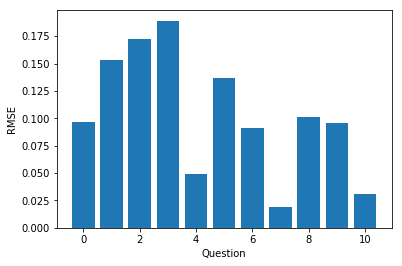

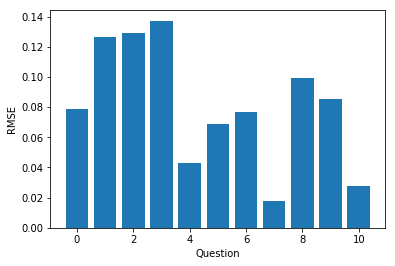

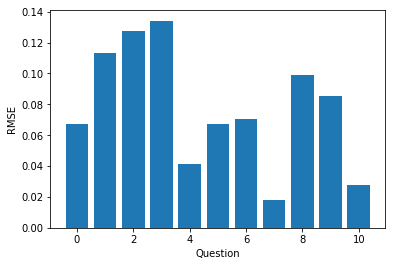

In [76]:
q=np.arange(11)
plotGraph(q,qwise_mse_LR)
plotGraph(q,qwise_mse_LoR)
plotGraph(q,qwise_mse_RR)


In [31]:
qwise_mse_LR=[0.07879490190612377, 0.1264636737479915, 0.12883303199479917, 0.13728021615288194, 0.042909335581535354, 0.06872239312948386, 0.0764688760838494, 0.018083135932463072, 0.0993138244747339, 0.0854839350029745, 0.028016165016722838]
qwise_mse_LoR=[0.07879490190612377, 0.1264636737479915, 0.12883303199479917, 0.13728021615288194, 0.042909335581535354, 0.06872239312948386, 0.0764688760838494, 0.018083135932463072, 0.0993138244747339, 0.0854839350029745, 0.028016165016722838]
qwise_mse_RR=[0.06709163941600697, 0.11294906184985593, 0.1272434717827885, 0.13414476639522435, 0.0411297575108739, 0.06717222346540266, 0.07059526390261724, 0.01800686368796664, 0.09867127745614068, 0.0851499390388744, 0.02786917349577155]

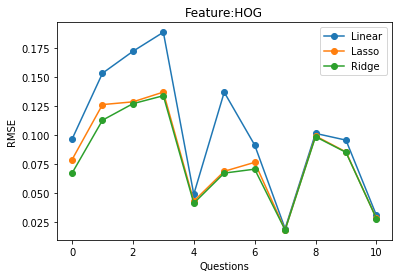

In [74]:
plt.plot(q,qwise_mse_LR,marker='o')
plt.plot(q,qwise_mse_LoR,marker='o')
plt.plot(q,qwise_mse_RR,marker='o')
plt.xlabel("Questions")
plt.ylabel("RMSE")
plt.legend(["Linear","Lasso","Ridge"])
plt.title("Feature:HOG")
plt.show()

# CNN

In [11]:
cnn_q1=np.array(pd.read_csv("Q1_Output.csv").drop("Id",axis=1))
cnn_q2=np.array(pd.read_csv("Q2_Output.csv").drop("Id",axis=1))
cnn_q3=np.array(pd.read_csv("Q3_Output.csv").drop("Id",axis=1))
cnn_q4=np.array(pd.read_csv("Q4_Output.csv").drop("Id",axis=1))
cnn_q5=np.array(pd.read_csv("Q5_Output.csv").drop("Id",axis=1))
cnn_q6=np.array(pd.read_csv("Q6_Output.csv").drop("Id",axis=1))
cnn_q7=np.array(pd.read_csv("Q7_Output.csv").drop("Id",axis=1))
cnn_q8=np.array(pd.read_csv("Q8_Output.csv").drop("Id",axis=1))
cnn_q9=np.array(pd.read_csv("Q9_Output.csv").drop("Id",axis=1))
cnn_q10=np.array(pd.read_csv("Q10_Output.csv").drop("Id",axis=1))
cnn_q11=np.array(pd.read_csv("Q11_Output.csv").drop("Id",axis=1))
cnn_pred=[cnn_q1,cnn_q2,cnn_q3,cnn_q4,cnn_q5,cnn_q6,cnn_q7,cnn_q8,cnn_q9,cnn_q10,cnn_q11]

In [28]:
qwise_mse_cnn=rmse_calculation(Q_idx,cnn_pred)

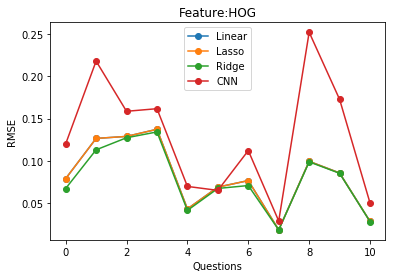

In [33]:
q=np.arange(11)
plt.plot(q,qwise_mse_LR,marker='o')
plt.plot(q,qwise_mse_LoR,marker='o')
plt.plot(q,qwise_mse_RR,marker='o')
plt.plot(q,qwise_mse_cnn,marker='o')
plt.xlabel("Questions")
plt.ylabel("RMSE")
plt.legend(["Linear","Lasso","Ridge","CNN"])
plt.title("Feature:HOG")
plt.show()

In [30]:
print("CNN_MSE:",qwise_mse_cnn)

CNN_MSE: [0.1199660939587064, 0.21812121847379012, 0.1586162696870938, 0.16169035562613449, 0.06956652246919541, 0.0648592013934437, 0.1120542860412705, 0.028578594345965956, 0.25230878704595794, 0.17275799934307204, 0.04989915024583618]
